In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from sklearn.linear_model import LogisticRegression

from optbinning import OptimalBinning
from optbinning import BinningProcess
from optbinning import Scorecard
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks
from sklearn.model_selection import train_test_split

# Import and transform data

In [2]:
feature_table = pd.read_csv(r"C:\Users\mjklo\Downloads\feature_table.csv")

In [3]:
feature_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   client_id                            1206 non-null   int64  
 1   months_on_book                       1206 non-null   float64
 2   average_affordability_last_x_months  1206 non-null   float64
 3   incoming_frequency                   1206 non-null   float64
 4   outgoing_frequency                   1206 non-null   float64
 5   incoming_variance                    1206 non-null   float64
 6   outgoing_variance                    1206 non-null   float64
 7   cumulative_balance                   1206 non-null   float64
 8   incoming_volume                      1206 non-null   float64
 9   outgoing_volume                      1206 non-null   float64
 10  incoming_amount                      1206 non-null   float64
 11  outgoing_amount               

In [4]:
feature_table.head()

,client_id,months_on_book,average_affordability_last_x_months,incoming_frequency,outgoing_frequency,incoming_variance,outgoing_variance,cumulative_balance,incoming_volume,outgoing_volume,incoming_amount,outgoing_amount,positive_balance_ratio,affordability_buffer,direction_ratio,target
0,0,189.553219,4982.388333,0.029525,5.156151,6.730129e+05,63290.400000,625799.67,101.666667,5.500000,5602.388333,-620.000000,1.0,125.602347,0.110667,0
1,1,189.553219,2948.665000,0.043706,24.617021,1.639791e+06,173804.916667,336187.37,82.500000,2.250000,3265.498333,-475.250000,1.0,114.013416,0.145537,1
2,2,189.553219,2396.293333,0.046422,6.585799,2.996908e+05,18802.966667,291534.27,87.833333,4.833333,2783.460000,-387.166667,1.0,121.660510,0.139095,0
3,3,189.520368,2496.531667,0.197948,66.415094,2.710008e+05,97571.700000,280685.46,51.333333,1.600000,2757.198333,-312.800000,1.0,112.430162,0.113448,0
4,4,189.553219,5169.085000,0.012374,4.995427,4.076205e+05,140812.266667,595722.36,124.166667,6.000000,5735.751667,-566.666667,1.0,115.247159,0.098796,0


In [5]:
feature_table.target = feature_table.target.astype(object)

In [6]:
train, test = train_test_split(feature_table, test_size=0.2, random_state=42)

In [7]:
len(train[train.target == 1])/len(train)

0.05186721991701245

In [8]:
variable_names = list(train.columns[train.columns.isin(['target', 'client_id', 'average_affordability_last_x_months', 'cumulative_balance', 'incoming_amount', 'outgoing_amount', 'positive_balance_ratio']) == False])
X_train = train[variable_names]
y_train = train['target'].values.astype(int)

variable_names = list(test.columns[test.columns.isin(['target', 'client_id', 'average_affordability_last_x_months', 'cumulative_balance', 'incoming_amount', 'outgoing_amount', 'positive_balance_ratio']) == False])
X_test = test[variable_names]
y_test = test['target'].values.astype(int)

# Define selection criteria

In [9]:
selection_criteria = {"iv": {"min": 0.002, 'max':10, "strategy": "highest"}}  

list_categorical = X_train.select_dtypes(include = ['object']).columns.values

list_features = X_train.columns.values

In [10]:
binning_process = BinningProcess(
    categorical_variables=list_categorical,
    variable_names=variable_names,
    max_bin_size = 0.5,
    selection_criteria=selection_criteria
)

In [11]:
logreg = LogisticRegression(C=3, max_iter=1000, random_state=161)

In [12]:
# define scaling method and values
scaling_method = "min_max"
scaling_method_data = {"min": 0, "max": 100}

# instatiate and fit Scorecard
scorecard = Scorecard(
    binning_process=binning_process,
    estimator=logreg,
    scaling_method=scaling_method,
    scaling_method_params=scaling_method_data,
    intercept_based=False,
    reverse_scorecard=False,
)

# Fit scorecard

In [13]:
scorecard.fit(X_train, y_train, show_digits=4)

c:\Users\mjklo\GitHub\uct-repos\ftc-lendx\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\mjklo\GitHub\uct-repos\ftc-lendx\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\mjklo\GitHub\uct-repos\ftc-lendx\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\mjklo\GitHub\uct-repos\ftc-lendx\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\mjklo\GitHub\uct-repos\ftc-lendx\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force

,binning_process,BinningProces...ction_ratio'])
,estimator,LogisticRegre...dom_state=161)
,scaling_method,'min_max'
,scaling_method_params,"{'max': 100, 'min': 0}"
,intercept_based,False
,reverse_scorecard,False
,rounding,False
,verbose,False
,variable_names,"['months_on_book', 'incoming_frequency', ...]"
,max_n_prebins,20
,min_prebin_size,0.05


In [14]:
summary = scorecard.table(style="detailed")
summary

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,months_on_book,0,"(-inf, 177.5460)",62,0.064315,61,1,0.016129,1.205066,0.056324,0.006643,-0.314071,8.118476
1,months_on_book,1,"[177.5460, inf)",902,0.935685,853,49,0.054324,-0.048868,0.002284,0.000285,-0.314071,5.292142
2,months_on_book,2,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.314071,5.402290
3,months_on_book,3,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.314071,5.402290
0,incoming_frequency,0,"(-inf, 0.0023)",74,0.076763,68,6,0.081081,-0.478059,0.021800,0.002699,-0.681916,3.062731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,direction_ratio,2,"[0.0655, 0.0903)",157,0.162863,150,7,0.044586,0.158918,0.003832,0.000479,-0.497772,5.969996
3,direction_ratio,3,"[0.0903, 0.1049)",100,0.103734,96,4,0.040000,0.272246,0.006815,0.000849,-0.497772,6.374843
4,direction_ratio,4,"[0.1049, inf)",499,0.517635,491,8,0.016032,1.211195,0.456862,0.053855,-0.497772,9.729077
5,direction_ratio,5,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.497772,5.402290


In [15]:
summary.groupby('Variable')['IV'].sum()

Variable
affordability_buffer    0.129818
direction_ratio         1.036913
incoming_frequency      0.339266
incoming_variance       0.188573
incoming_volume         0.189209
months_on_book          0.058608
outgoing_frequency      1.293353
outgoing_variance       0.932868
outgoing_volume         2.080040
Name: IV, dtype: float64

# Evaluate scorecard

In [16]:
y_pred = scorecard.predict_proba(X_test)[:, 1]

c:\Users\mjklo\GitHub\uct-repos\ftc-lendx\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\mjklo\GitHub\uct-repos\ftc-lendx\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


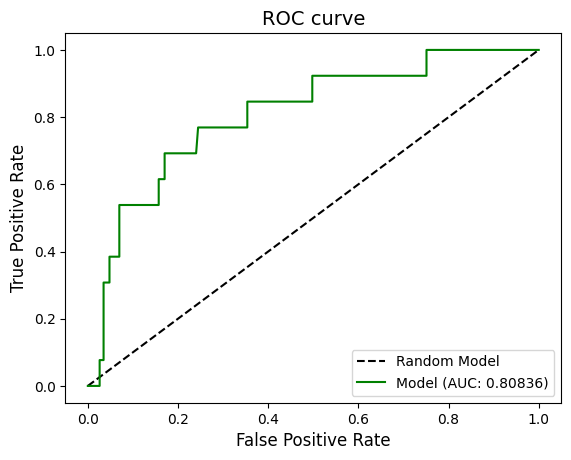

In [17]:
plot_auc_roc(y_test, y_pred)

c:\Users\mjklo\GitHub\uct-repos\ftc-lendx\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\mjklo\GitHub\uct-repos\ftc-lendx\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


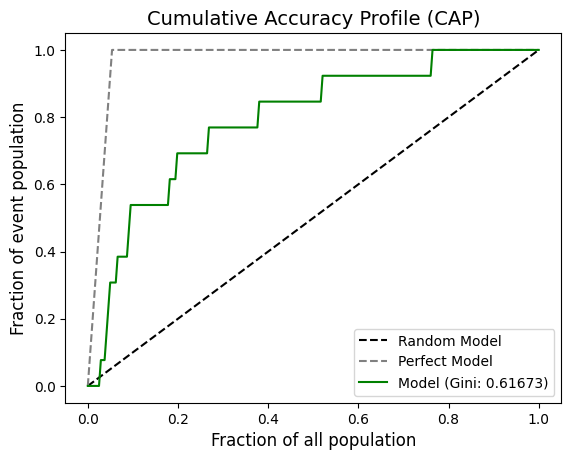

In [18]:
plot_cap(y_test, y_pred)

c:\Users\mjklo\GitHub\uct-repos\ftc-lendx\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\mjklo\GitHub\uct-repos\ftc-lendx\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


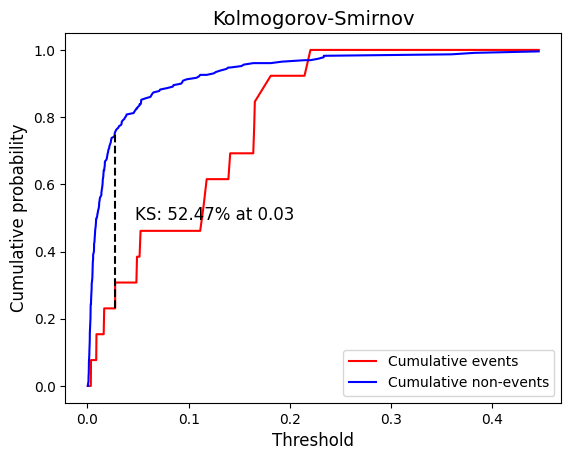

In [19]:
plot_ks(y_test, y_pred)

In [20]:
score = scorecard.score(X_test)

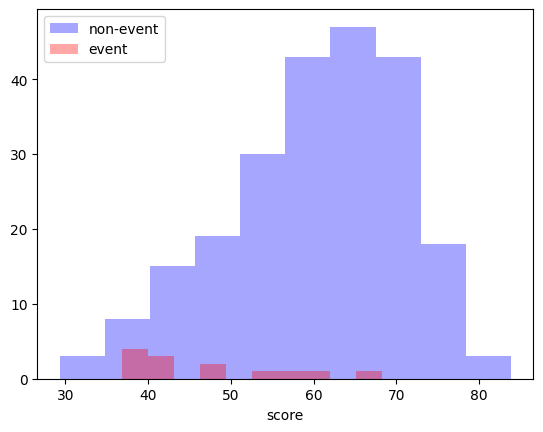

In [21]:
mask = y_test == 0
plt.hist(score[mask], label="non-event", color="b", alpha=0.35)
plt.hist(score[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score")
plt.legend()
plt.show()

# Save scorecard

In [22]:
scorecard.save('initial_trust_scorecard_v1.pkl')